## Lets Grow More - Data Science Internship
## Author : Shinde Akshata Karabhari
# Task 1 : Iris-Flowers Classification ML Project

## Import Libraries

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Loading The Dataset

In [56]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [58]:
data.drop(columns='Id',axis=1,inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [59]:
data.shape

(150, 5)

In [60]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [64]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

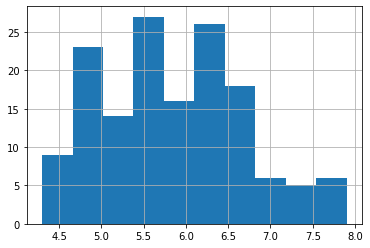

In [65]:
data['SepalLengthCm'].hist()

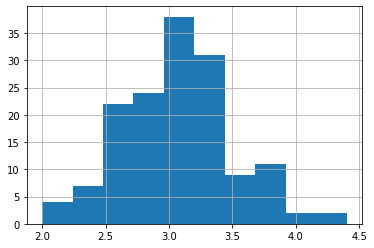

In [66]:
data['SepalWidthCm'].hist()

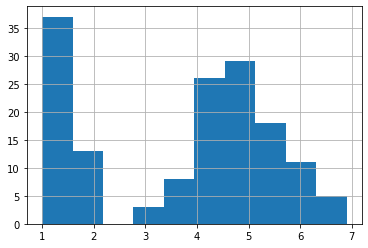

In [67]:
data['PetalLengthCm'].hist()

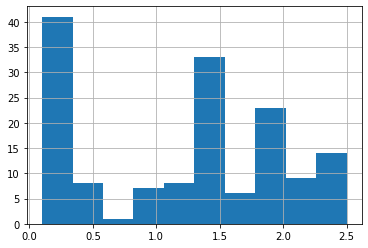

In [68]:
data['PetalWidthCm'].hist()

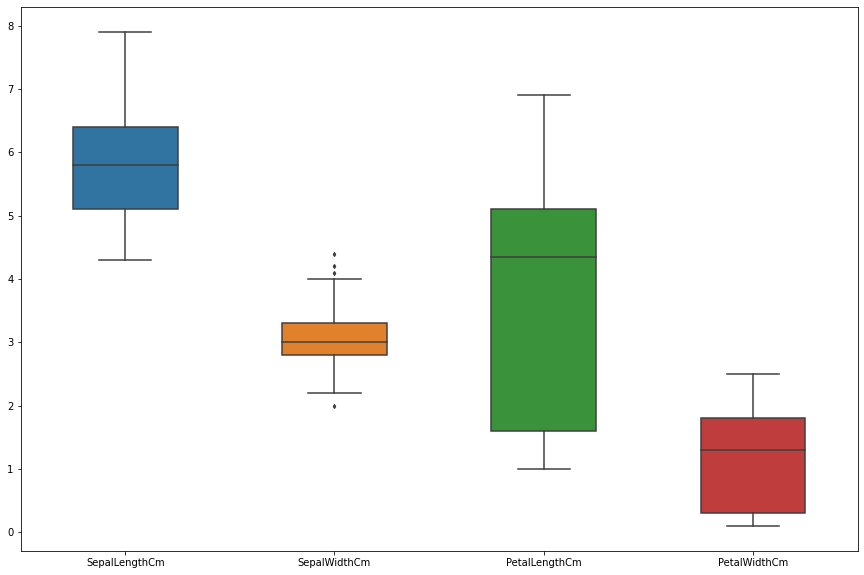

In [69]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [70]:
colors=['green','red','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

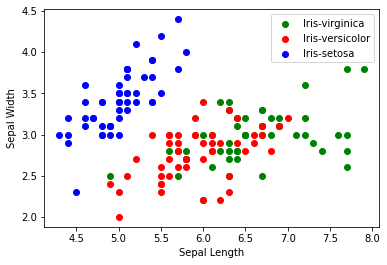

In [71]:
for i in range(3):
  x=data[data['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

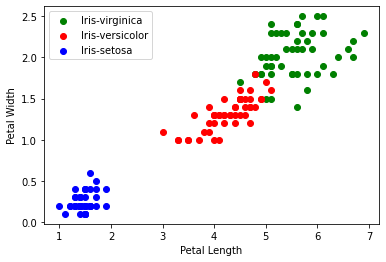

In [72]:
for i in range(3):
  x=data[data['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

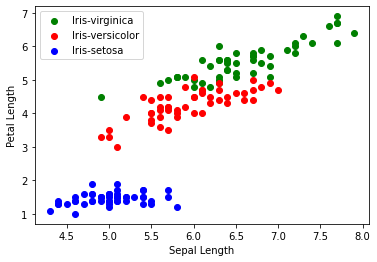

In [73]:
for i in range(3):
  x=data[data['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

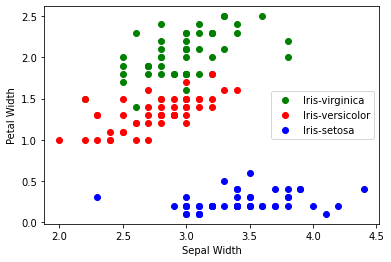

In [74]:
for i in range(3):
  x=data[data['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Correlation

In [75]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


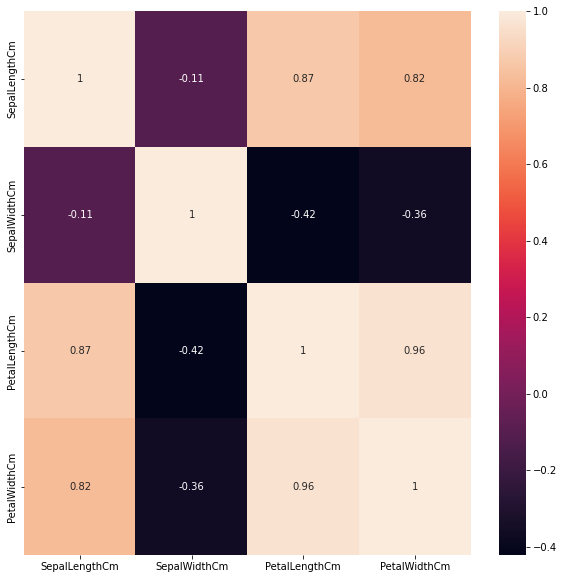

In [76]:
corr=data.corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
data['Species']=le.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
x= data.drop(columns='Species',axis =1)
y= data['Species']
print(x.shape)
print(y.shape)



(150, 4)
(150,)


## Splitting The Dataset

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### Building Models

## 1.Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [83]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


## 2.Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=20)

In [86]:
dtree.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [87]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


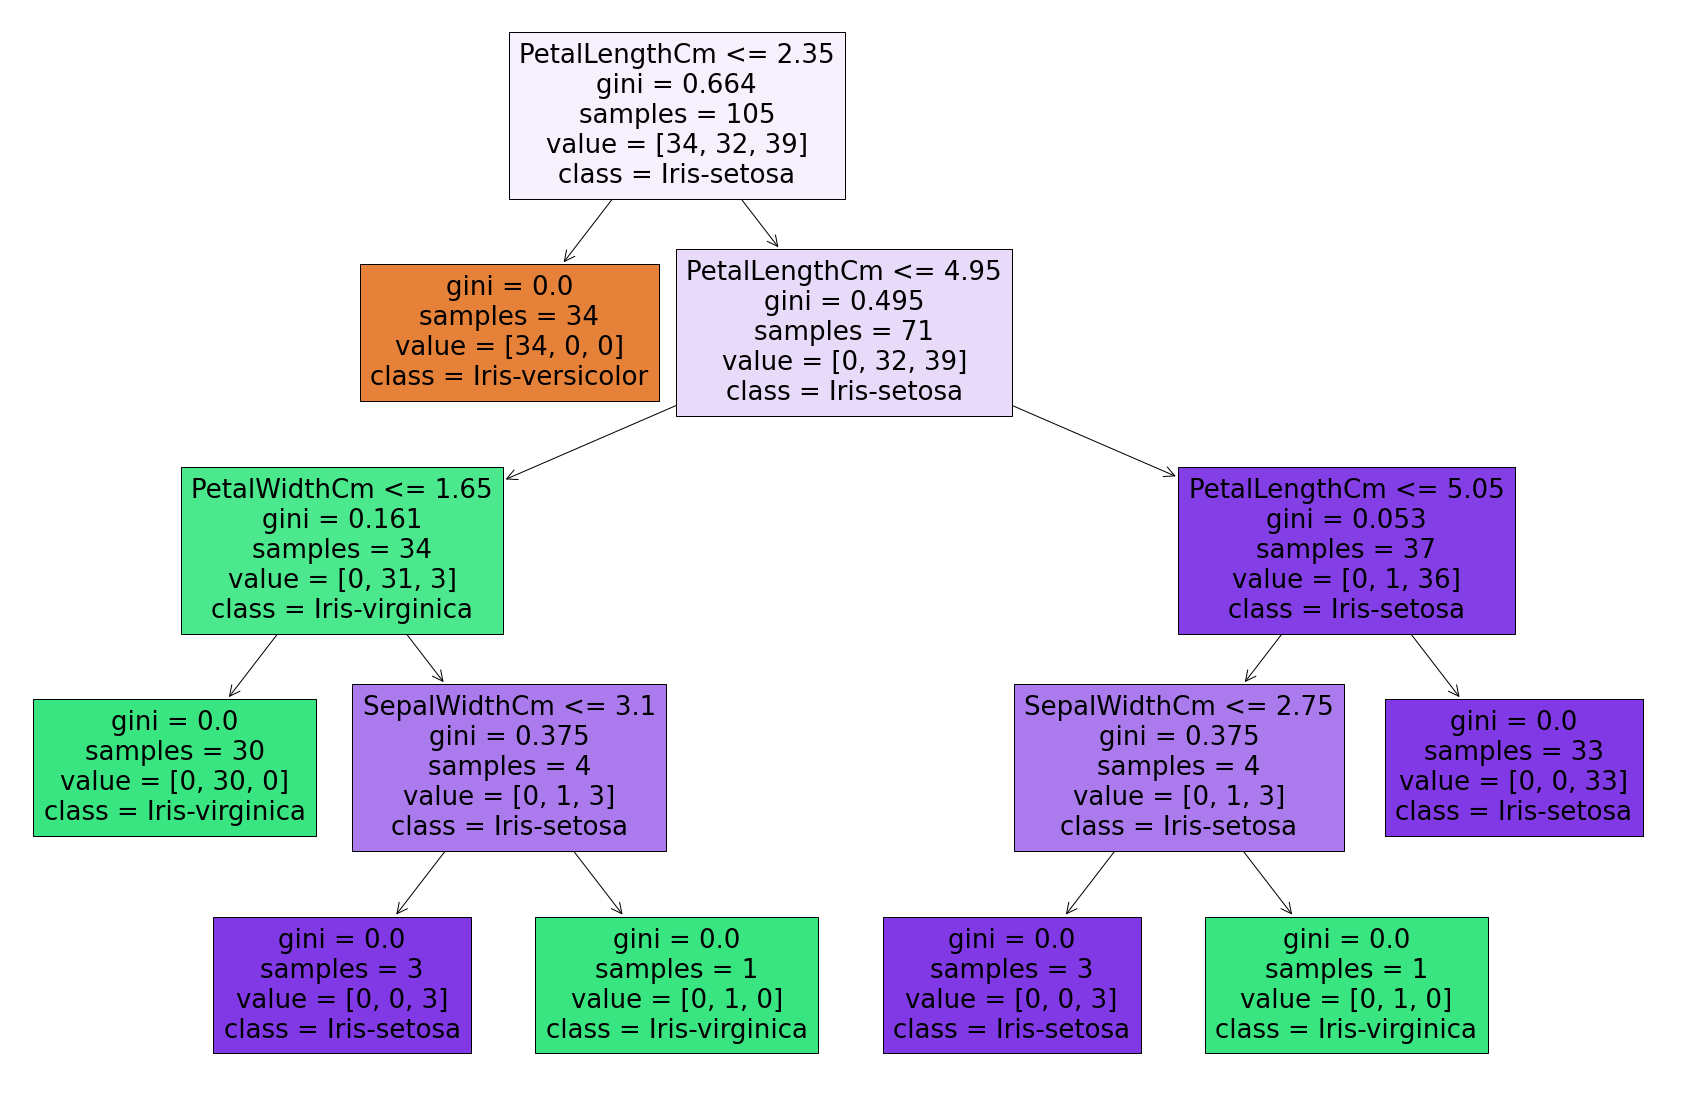

In [88]:
from sklearn import tree
plt.figure(figsize=(30,20))
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Iris-versicolor','Iris-virginica','Iris-setosa']
tree.plot_tree(dtree,feature_names=fn,class_names=cn,filled=True)
plt.show()



### Conclusion : Both Logistic Regression and Decision Tree Classifier have the same accuracy.

# Thank You